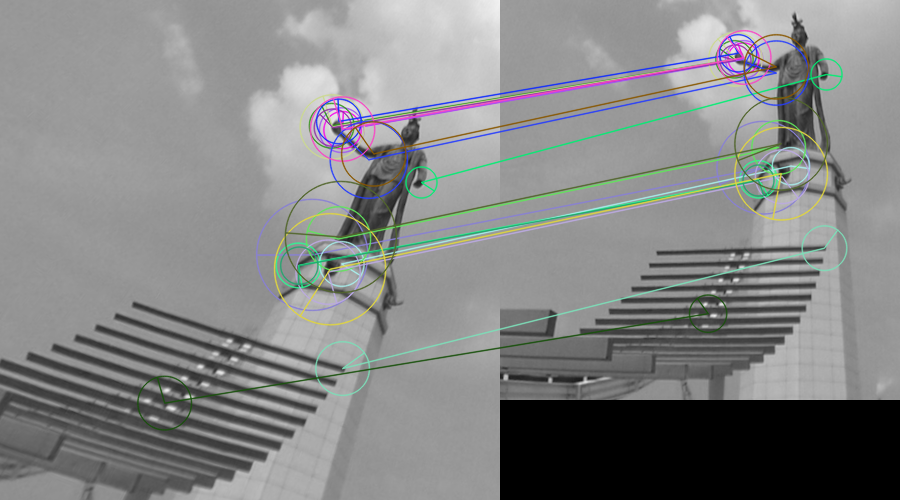

In [5]:
import numpy as np
import cv2
import PIL.Image
img1 = cv2.imread('pic01.jpg',0)          # queryImage
img2 = cv2.imread('pic02.jpg',0) # trainImage

# out = np.zeros((img2.shape[0],img1.shape[1]+img2.shape[1],3),np.uint8)
# ORB 特徴検出器を生成
orb = cv2.ORB_create()

# ORB特徴のキーポイントと記述を生成
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# 総当り照合器を、評価尺度＝ハミング距離、クロスチェックあり＝ desc2 からみても最適な対応であることをチェック
# （注意）ハミング距離はバイナリ型の特徴検出器でないと指定してはいけません
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# 各特徴にマッチする記述を得る
matches = bf.match(des1,des2)
 
# 照合対を距離の小さいもの順に並べ替える
matches = sorted(matches, key = lambda x:x.distance)
 
# 上位20ペアまでを描画.
#out = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=0) # デフォルト
#out2 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=2) # 孤立点を描かない
#out4 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=4) # 特徴サイズに応じた円を描く
out6 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20],None,flags=6) # 上２つの組わせ
PIL.Image.fromarray(out6[:,:,::-1])

